In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def decision_boundary(preds, p=0.5):
    return preds > p

In [4]:
def calc_iou(preds, y):
    return np.logical_and(preds, y).sum() / np.logical_or(preds, y).sum()

In [23]:
def considered_boundary(preds):
    # start with threshold 0.5
    thresh = 0
    preds = np.sort(preds)[::-1]
    expected_intersection =  0
    union_lower_bound = 0
    for i, p in enumerate(preds):
        if p>0.5:
            expected_intersection+=p
            continue
        iou_lower_bound = expected_intersection / i
        thresh = (1+iou_lower_bound**-1)**-1
        if p>thresh:
            expected_intersection+=p
        else:
            return thresh

In [80]:
def experiment(preds, noisey_preds=None):

    y = np.random.random(preds.shape)<preds
    ps = np.linspace(0, 1, 100)
    ious = [calc_iou(decision_boundary(preds, p), y) for p in ps]
    
    fig, axes = plt.subplots(1,2, figsize=(8,3))
    axes[0].hist(preds, bins=30)
    axes[1].plot(ps, ious)
    
    if noisey_preds is not None:
        ious_noise = [calc_iou(decision_boundary(noisey_preds, p), y) for p in ps]
        axes[1].plot(ps, ious_noise, label = 'Noisey')
        
    plt.show()
    
    
    
    my_thresh = considered_boundary(preds)
    my_iou = calc_iou(decision_boundary(preds, my_thresh), y)
    if noisey_preds is not None:
        my_thresh_noise = considered_boundary(noisey_preds)
        my_iou_noise = calc_iou(decision_boundary(noisey_preds, my_thresh_noise), y)
    print(f"Optimal             p>{ps[np.argmax(ious)]:.5f} -> IoU = {max(ious):.5f}")
    if noisey_preds is not None:
        print(f"Optimal w/ noise    p>{ps[np.argmax(ious_noise)]:.5f} -> IoU = {max(ious_noise):.5f}")
    print(f"Estimated           p>{my_thresh:.5f} -> IoU = {my_iou:.5f}")
    if noisey_preds is not None:
        print(f"Estimated w/ noise  p>{my_thresh_noise:.5f} -> IoU = {my_iou_noise:.5f}")
    print(f"Simple              p>{0.5:.5f} -> IoU = {calc_iou(decision_boundary(preds, 0.5), y):.5f}")
    if noisey_preds is not None:
        print(f"Simple w/ noise     p>{0.5:.5f} -> IoU = {calc_iou(decision_boundary(noisey_preds, 0.5), y):.5f}")

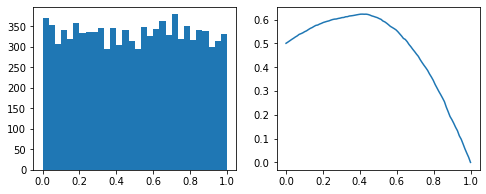

Optimal             p>0.41414 -> IoU = 0.62292
Estimated           p>0.41441(0.41441) -> IoU = 0.62301
Simple              p>0.50000 -> IoU = 0.60607


In [72]:
preds = np.random.random(10000)

experiment(preds)

In [73]:
def add_clip(preds, noise):
    return (preds+noise).clip(0,1)

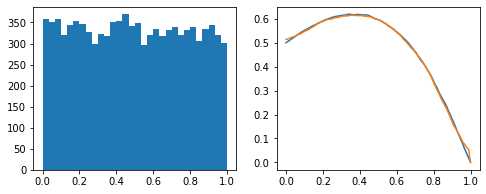

Optimal             p>0.34343 -> IoU = 0.61960
Optimal w/ noise    p>0.34343 -> IoU = 0.61960
Estimated           p>0.41278(0.41278) -> IoU = 0.61663
Estimated w/ noise  p>0.41278(0.41278) -> IoU = 0.61663
Simple              p>0.50000 -> IoU = 0.59577
Simple w/ noise     p>0.50000 -> IoU = 0.59648


In [74]:
preds = np.random.random(10000)

noise = (np.random.random(10000)*0.2)-0.1

experiment(preds, add_clip(preds, noise))

In [37]:
def power_draw(n, pow):
    ps = np.random.random((n, abs(pow)))
    if pow>0:
        return ps.max(axis=1)
    else:
        return ps.min(axis=1)

In [56]:
def median_power_draw(n, pow):
    return np.median(np.random.random((n, abs(pow))), axis=1)

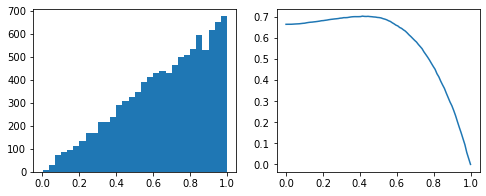

Optimal > p>0.41414 -> IoU = 0.70498
Estimated p>0.42901 -> IoU = 0.70404
Simple p>0.50000 -> IoU = 0.69863


In [38]:
experiment(power_draw(10000, 2))

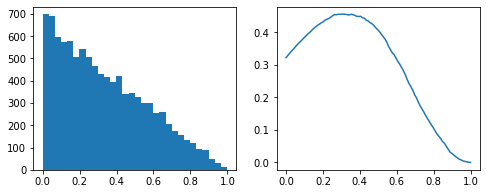

Optimal > p>0.30303 -> IoU = 0.45563
Estimated p>0.36517 -> IoU = 0.45352
Simple p>0.50000 -> IoU = 0.40675


In [39]:
experiment(power_draw(10000, -2))

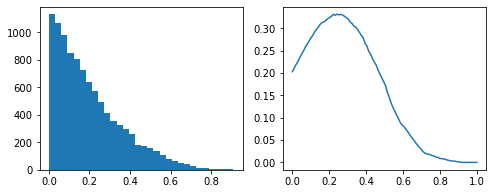

Optimal > p>0.24242 -> IoU = 0.33130
Estimated p>0.31114 -> IoU = 0.31298
Simple p>0.50000 -> IoU = 0.17500


In [40]:
experiment(power_draw(10000, -4))

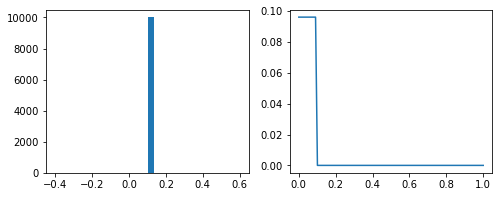

ZeroDivisionError: division by zero

In [41]:
experiment((np.ones(10000)*0.1))

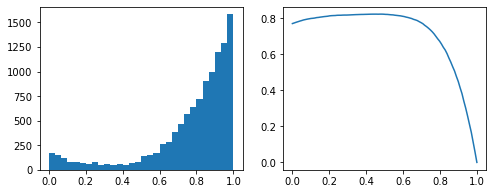

Optimal > p>0.47475 -> IoU = 0.82413
Estimated p>0.45677 -> IoU = 0.82429
Simple p>0.50000 -> IoU = 0.82327


In [42]:
experiment(np.concatenate([power_draw(10000, 5), power_draw(1000, -5)]))


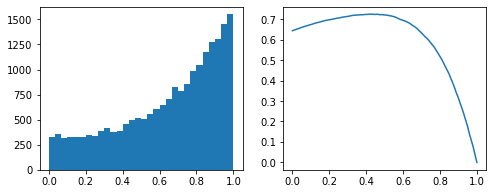

Optimal > p>0.42424 -> IoU = 0.72492
Estimated p>0.43759 -> IoU = 0.72386
Simple p>0.50000 -> IoU = 0.72112


In [43]:
experiment(np.concatenate([power_draw(10000, 4), power_draw(10000, 1)]))

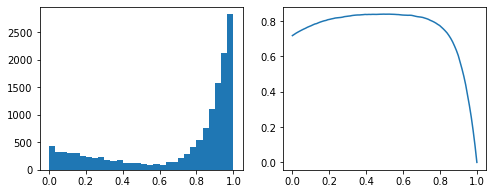

Optimal > p>0.49495 -> IoU = 0.83976
Estimated p>0.47127 -> IoU = 0.83894
Simple p>0.50000 -> IoU = 0.83945


In [44]:
experiment(np.concatenate([power_draw(10000, 10), power_draw(4000, -3)]))

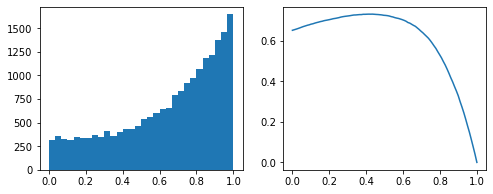

Optimal > p>0.43434 -> IoU = 0.73007
Estimated p>0.43881 -> IoU = 0.72972
Simple p>0.50000 -> IoU = 0.72427


In [46]:
preds = np.concatenate([power_draw(10000, 4), power_draw(10000, 1)])

experiment(preds)

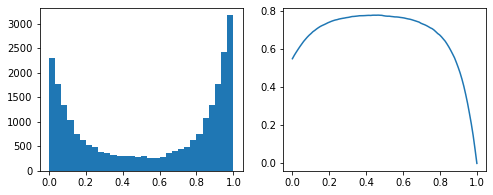

Optimal > p>0.46465 -> IoU = 0.77875
Estimated p>0.46114 -> IoU = 0.77822
Simple p>0.50000 -> IoU = 0.77481


In [54]:
preds = np.concatenate([
    power_draw(10000, 10), 
    power_draw(7000, -10),
    np.random.random(8000),
])

experiment(preds)

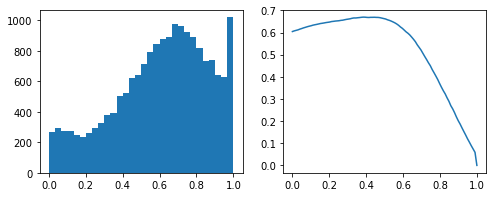

Optimal > p>0.38384 -> IoU = 0.66976
Estimated p>0.41710 -> IoU = 0.66861
Simple p>0.50000 -> IoU = 0.66254


In [63]:
preds = np.concatenate([
    (median_power_draw(10000, 4)+.2).clip(0, 1),
    np.random.random(8000),
])

experiment(preds)

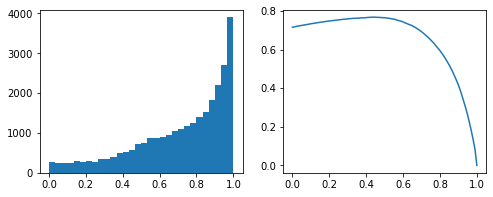

Optimal             p>0.43434 -> IoU = 0.76781
Estimated           p>0.44543 -> IoU = 0.76778
Simple              p>0.50000 -> IoU = 0.76491


In [77]:
preds = np.concatenate([
    (median_power_draw(10000, 4)+.2).clip(0, 1),
    power_draw(10000, 10),
    np.random.random(8000),
])

experiment(preds)

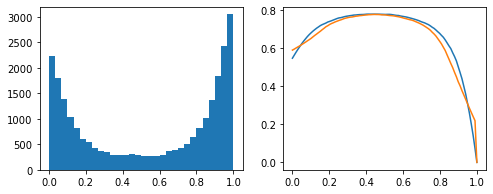

Optimal             p>0.41414 -> IoU = 0.77961
Optimal w/ noise    p>0.44444 -> IoU = 0.77800
Estimated           p>0.46086 -> IoU = 0.77939
Estimated w/ noise  p>0.45808 -> IoU = 0.77787
Simple              p>0.50000 -> IoU = 0.77851
Simple w/ noise     p>0.50000 -> IoU = 0.77579


In [86]:
preds = np.concatenate([
    power_draw(10000, 10), 
    power_draw(7000, -10),
    np.random.random(8000),
])

noise = ((np.random.random(preds.shape[0])-.5)*.3)

experiment(preds, add_clip(preds, noise))

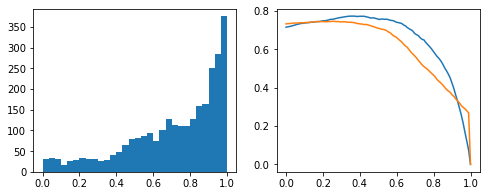

Optimal             p>0.35354 -> IoU = 0.77165
Optimal w/ noise    p>0.25253 -> IoU = 0.74477
Estimated           p>0.44473 -> IoU = 0.76625
Estimated w/ noise  p>0.44564 -> IoU = 0.72492
Simple              p>0.50000 -> IoU = 0.75505
Simple w/ noise     p>0.50000 -> IoU = 0.70856


In [90]:
preds = np.concatenate([
    (median_power_draw(1000, 4)+.2).clip(0, 1),
    power_draw(1000, 10),
    np.random.random(800),
])

noise = ((np.random.random(preds.shape[0])-.5)*.8)

experiment(preds, add_clip(preds, noise))

In [3]:
ls -l ../scripts/*.csv

-rw-rw-r-- 1 jovyan users 1834 Dec 22 21:53 ../scripts/rand_walk_threshold_stats_clean.csv
-rw-rw-r-- 1 jovyan users 5839 Dec 29 00:43 ../scripts/threshold_stats_all.csv
-rw-rw-r-- 1 jovyan users 5868 Dec 21 22:16 ../scripts/threshold_stats_clean.csv


In [25]:
df_clean = pd.read_csv("../scripts/threshold_stats_clean.csv")
df_all = pd.read_csv("../scripts/threshold_stats_all.csv")

<AxesSubplot:xlabel='Unnamed: 0'>

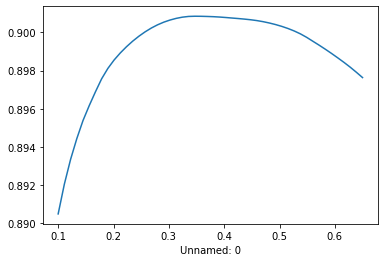

In [27]:
#df_clean.set_index('Unnamed: 0').IoU.plot()
df_all.set_index('Unnamed: 0').IoU.plot()

In [28]:
df = df_all

In [29]:
df

,Unnamed: 0,TP,TN,FP,FN,IoU
0,0.100000,0.606184,0.319261,0.059095,0.015460,0.890479
1,0.111224,0.605555,0.321162,0.057194,0.016089,0.892046
2,0.122449,0.604966,0.322806,0.055550,0.016678,0.893342
3,0.133673,0.604408,0.324252,0.054103,0.017236,0.894429
4,0.144898,0.603878,0.325563,0.052793,0.017766,0.895381
5,0.156122,0.603371,0.326716,0.051640,0.018273,0.896162
6,0.167347,0.602881,0.327806,0.050550,0.018763,0.896886
7,0.178571,0.602401,0.328854,0.049502,0.019243,0.897571
8,0.189796,0.601927,0.329788,0.048568,0.019717,0.898114
9,0.201020,0.601456,0.330640,0.047716,0.020188,0.898554


In [30]:
df.sort_values('IoU', ascending=False).head(10)

,Unnamed: 0,TP,TN,FP,FN,IoU
22,0.346939,0.596071,0.338326,0.040030,0.025573,0.900853
23,0.358163,0.595679,0.338759,0.039597,0.025965,0.900850
21,0.335714,0.596468,0.337878,0.040478,0.025177,0.900843
24,0.369388,0.595297,0.339177,0.039179,0.026347,0.900841
25,0.380612,0.594925,0.339581,0.038775,0.026719,0.900829
26,0.391837,0.594562,0.339970,0.038386,0.027083,0.900810
20,0.324490,0.596863,0.337411,0.040945,0.024781,0.900805
27,0.403061,0.594205,0.340348,0.038008,0.027439,0.900786
28,0.414286,0.593857,0.340715,0.037641,0.027787,0.900759
19,0.313265,0.597258,0.336926,0.041430,0.024386,0.900741


In [31]:
df.sort_values('IoU', ascending=False).head(1)

,Unnamed: 0,TP,TN,FP,FN,IoU
22,0.346939,0.596071,0.338326,0.04003,0.025573,0.900853
